# Higher or Lower: Genetic Algorithm

"Guess a number between 1 and 100" ... "no it's higher than that" ... "no it's lower than that" ... "yes you got it!"
We all know this game of higher or lower and it's pretty easy to work out the best strategy for guessing the number as quickly as possible - namely you want to guess halway between the bounds each time. Here we'll see if we can get a computer to work that out for itself... using a genetic algorithms.


In [1]:
# First we download some dependencies
import gameClass as HOL
import matplotlib.pyplot as plt
import numpy as np

## The non-genetic approach

It is not too hard to write a programme that will play the game for us. (I have done this in the gameClass.py .) We just have to tell it to choose a number between the current bounds. Here are three methods: 
1. Choose a number randomly between the bounds - "computer_random"
2. Choose a number halfway between the bounds - "computer_bifurcate"
3. Choose the smallest number possible within the bounds - "computer_bad"

Let's see how they cope:

In [2]:
game = HOL.Game()
game.method = "computer_random"
game.playGame()

Pick a number between 1 and 100:
41
Nope. You need to go higher.
Pick a number between 42 and 100:
96
Nope. You need to go lower.
Pick a number between 42 and 95:
55
Nope. You need to go higher.
Pick a number between 56 and 95:
91
Nope. You need to go higher.
Pick a number between 92 and 95:
92
Nope. You need to go higher.
Pick a number between 93 and 95:
93
Nope. You need to go higher.
Pick a number between 94 and 95:
94
Nope. You need to go higher.
Pick a number between 95 and 95:
95
YES! CONGRATULATIONS! THE NUMBER WAS  95
You got the answer correct after 8 guesses.


In [3]:
game = HOL.Game()
game.method = "computer_bifurcate"
game.playGame()

Pick a number between 1 and 100:
50
Nope. You need to go lower.
Pick a number between 1 and 49:
25
Nope. You need to go higher.
Pick a number between 26 and 49:
38
Nope. You need to go higher.
Pick a number between 39 and 49:
44
Nope. You need to go higher.
Pick a number between 45 and 49:
47
YES! CONGRATULATIONS! THE NUMBER WAS  47
You got the answer correct after 5 guesses.


In [4]:
game = HOL.Game()
game.method = "computer_bad"
game.playGame()

Pick a number between 1 and 100:
1
Nope. You need to go higher.
Pick a number between 2 and 100:
2
Nope. You need to go higher.
Pick a number between 3 and 100:
3
Nope. You need to go higher.
Pick a number between 4 and 100:
4
Nope. You need to go higher.
Pick a number between 5 and 100:
5
Nope. You need to go higher.
Pick a number between 6 and 100:
6
Nope. You need to go higher.
Pick a number between 7 and 100:
7
Nope. You need to go higher.
Pick a number between 8 and 100:
8
Nope. You need to go higher.
Pick a number between 9 and 100:
9
Nope. You need to go higher.
Pick a number between 10 and 100:
10
Nope. You need to go higher.
Pick a number between 11 and 100:
11
Nope. You need to go higher.
Pick a number between 12 and 100:
12
Nope. You need to go higher.
Pick a number between 13 and 100:
13
Nope. You need to go higher.
Pick a number between 14 and 100:
14
Nope. You need to go higher.
Pick a number between 15 and 100:
15
Nope. You need to go higher.
Pick a number between 16 and

How did they do? Lets get the computer to play the game many times with each method and look at some statistics. 

In [5]:
# play the game many times with each method.store no. guesses to win. 
game = HOL.Game()
game.narrate = "False" # this turns off the commentary

Nrepeats = 100
methods = ["computer_random", "computer_bifurcate", "computer_bad"]
nguesses = np.zeros((len(methods), Nrepeats))  # store our guesses here.


for method_number, method in enumerate(methods):
    game.method = method
    for i in range(Nrepeats):
        game.playGame()
        nguesses[method_number, i] = len(game.guesses) 
        game.reset()

mean_nguesses = np.mean(nguesses, 1)

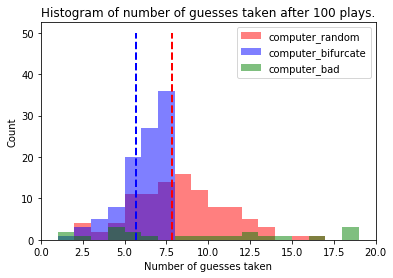

In [6]:
# plot the number of guesses it took each method as a histogram. i.e. how many times did each method guess correctly after 1 guess, 2 guesses, 3guesses etc.
colors = ['r', 'b', 'g']
for method_number in range(len(methods)):
    plt.hist(nguesses[method_number,  :], bins = range(20), alpha = 0.5, label = methods[method_number], color  = colors[method_number])
    plt.plot([mean_nguesses[method_number], mean_nguesses[method_number]], [0, Nrepeats/2], color  = colors[method_number], linestyle = '--', linewidth=2)
plt.legend()
plt.title("Histogram of number of guesses taken after " + str(Nrepeats) +  " plays.")
plt.xlabel("Number of guesses taken")
plt.ylabel("Count")
plt.xlim([0,20])
plt.show()

Here we have played the game many times with each method and counted how many guesses it took until the computer guessed correctly. This is plotted in the histogram above. The dashed line represents the average (mean) number of guesses it took.

The different methods have different results with the bifurcation method clearly outperfoming the other two methods. The "computer_bad" method is so poor the mean number of guesses doesn't show on the plot. Now let's use a genetic algorithm to let the computer decide a method for itself.

## Genetic approach

Genetic algorithms... 

Here we define a single "method" by a number $r$ between 0 and 1. This tells the computer where to guess between the bounds. When asked to choose a number between the upper bound, $u$, and the lower bound, $l$, the computer will choose $$\text{guess}_i = l + r_i(u - l).$$

Our generation size will be 100 and we create our first generation simply by choosing 100 random numbers between 0 and 1. 

In [7]:
# number of methods in each generation, i.e. population size
Npop = 100

methods = np.random.rand(Npop)

We run the game 100 times  with each "method" and define the fitness of each method by the mean number of guesses it took to  guess the number correctly. The lower the better!

In [8]:
Nrepeats = 100
Ngens = 10 # number of generations we'll want
nguesses = np.zeros((Ngens, Npop, Nrepeats))  # store the number-of-guesses-taken here.
mean_nguesses = np.zeros((Ngens, Npop)) # store mean number-of-guesses here

game = HOL.Game()
game.narrate = "False" # this turns off the commentary

# play the game many times for each method
for method_number, method in enumerate(methods):
    game.method = method
    for i in range(Nrepeats):
        game.playGame()
        nguesses[0, method_number, i] = len(game.guesses) 
        game.reset()
        
# average to find mean number of guesses for each method

mean_nguesses[0, :] = np.mean(nguesses[0, :, :], 1)

# order by lowest mean_nguesses first

order = mean_nguesses[0, :].argsort()
mean_nguesses[0, :] = mean_nguesses[0, order]
methods = methods[order]

Let's have a look at the best and worst methods in this first generation:

In [9]:
# best
print('The BEST method in this generation guesses with the ratio r =', str(methods[0]),
      ' which guesses correctly after an average of ', str(mean_nguesses[0, 0]), ' guesses.')

# worst
print('The WORST method in this generation guesses with the ratio r = ', str(methods[-1]),
      ' which guesses correctly after an average of ', str(mean_nguesses[0, -1]), ' guesses.')

The BEST method in this generation guesses with the ratio r = 0.429627871239988  which guesses correctly after an average of  5.56  guesses.
The WORST method in this generation guesses with the ratio r =  0.0011539240017819363  which guesses correctly after an average of  50.02  guesses.


So as we would expect guessing a number about halfway between the bounds is a better tactic. Now let's create a new generation... EVOLVE!

Here we will use a VERY simple method for obtaining a new generation: Take the best method from the generation and calculate the mean between itself and every other method in the generation. 

In [10]:
# add new generation to methods
methods = np.vstack([methods, np.zeros((1, Npop))])
for i in range(Npop):
    methods[1, i] = (methods[0, 0] + methods[0, i])/2

Now we have our new generation we can start repeating the process. Let's create 10 generations in total. 

In [11]:
for ngen in range(1, 10):
    # play the game many times for each method in generation
    for method_number, method in enumerate(methods[ngen, :]):
        game.method = method
        for i in range(Nrepeats):
            game.playGame()
            nguesses[ngen, method_number, i] = len(game.guesses) 
            game.reset()

    # average to find mean number of guesses for each method

    mean_nguesses[ngen, :] = np.mean(nguesses[ngen, :, :], 1)

    # order by lowest mean_nguesses first

    order = mean_nguesses[ngen, :].argsort()
    mean_nguesses[ngen, :] = mean_nguesses[ngen, order]
    methods[ngen, :] = methods[ngen, order]
    
    # add new generation to methods
    methods = np.vstack([methods, np.zeros((1, Npop))])
    for i in range(Npop):
        methods[ngen + 1, i] = (methods[ngen, 0] + methods[ngen, i])/2

Now we have our generations. Let's look at the best method in each generation:

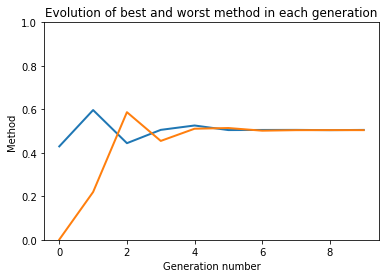

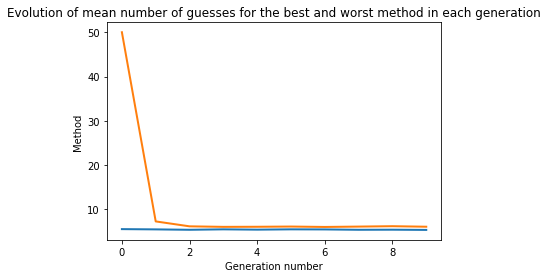

In [12]:
plt.plot(np.arange(Ngens), methods[0:10, 0],  linewidth=2)
plt.plot(np.arange(Ngens), methods[0:10, -1],  linewidth=2)
plt.title("Evolution of best and worst method in each generation")
plt.xlabel("Generation number")
plt.ylabel("Method")
plt.ylim([0,1])
plt.show()

plt.plot(np.arange(Ngens), mean_nguesses[0:10, 0],  linewidth=2)
plt.plot(np.arange(Ngens), mean_nguesses[0:10, -1],  linewidth=2)
plt.title("Evolution of mean number of guesses for the best and worst method in each generation")
plt.xlabel("Generation number")
plt.ylabel("Method")
plt.show()

Well there you go. The algorithm very quickly settles to r = 0.5 as the best method.

As we are only optimising a single parameter, r. So even just randomly searching the parameter space (which is what happens when we create our first generation) can very quickly find the best answer. 

Problems with larger parameter spaces are where genetic algorithms and machine learning comes in handy. 

Further problems with the genetic algorithm presented here is the evolution step. What if our initial generation only made guesses between 0 and 0.25 say. The pair averaging process would never create guesses outside of this range. To explore the whole parameter space a random shift (mutations) should be included. 